In [8]:
import pandas as pd
import os 

In [9]:
path= os.getcwd().split('/')
i=path.index('Alignment-of-schema-only-and-instance-only-data')
folder_path= "/".join(path[:i+1])

llama=pd.read_csv(folder_path+"/Results_Experiments/llama_results/llama_with_time.csv")
gpt=pd.read_csv(folder_path+"/Results_Experiments/GPT_results/gpt_with_time.csv")

In [10]:
gpt.columns

Index(['Model', 'Category', 'Dataset Name', 'noise', 'models', 'Relation Type',
       'Relation_binaire', 'Source 1 Attribute Count',
       'Source 2 Attribute Count', 'Common Attribute Count',
       'pourcentage_commun', 'Precision Median', 'Recall Median',
       'F1 Score Median', 'ngcd_at_median', 'Precision (Top n%)',
       'Recall (Top n%)', 'F1 Score (Top n%)', 'ngcd_at_n',
       'Precision (Top 2n%)', 'Recall (Top 2n%)', 'F1 Score (Top 2n%)',
       'ngcd_at_2n', 'F1 Score (Top 25)', 'ngcd_at_25', 'F1 Score (Top 20)',
       'ngcd_at_20', 'F1 Score (Top 15)', 'ngcd_at_15', 'F1 Score (Top 10)',
       'ngcd_at_10', 'F1 Score (Top 7)', 'ngcd_at_7', 'F1 Score (Top 5)',
       'ngcd_at_5', 'Execution_Time'],
      dtype='object')

## GPT

In [11]:
gpt.groupby(["Category", "Relation Type"])[['F1 Score Median','ngcd_at_median']].agg(['mean', 'std'])

F1 Score Median           ngcd_at_median   
                                          mean       std           mean   
Category Relation Type                                                    
ChEMBL   Joinable                     0.438393  0.256592       0.655714  \
         Semantically-Joinable        0.443839  0.242755       0.685506   
         Unionable                    0.827183  0.089996       0.859841   
         View-Unionable               0.428988  0.244538       0.644018   
Magellan Unionable                    0.913878  0.146626       0.935102   
TPC-DI   Joinable                     0.490565  0.287818       0.703274   
         Semantically-Joinable        0.490327  0.288250       0.713958   
         Unionable                    0.754087  0.097815       0.814603   
         View-Unionable               0.444286  0.257186       0.667113   
Wikidata Joinable                     0.538571  0.044881       0.742857   
         Semantically-Joinable        0.297143  0.061296       0.397143   
         Unionable                    0.987143  0.016036       0.987143   
         View-Unionable               0.476667  0.065013       0.676667   

                                          
                                     std  
Category Relation Type                    
ChEMBL   Joinable               0.293013  
         Semantically-Joinable  0.276531  
         Unionable              0.078039  
         View-Unionable         0.301007  
Magellan Unionable              0.112697  
TPC-DI   Joinable               0.328975  
         Semantically-Joinable  0.325950  
         Unionable              0.076577  
         View-Unionable         0.311329  
Wikidata Joinable               0.097419  
         Semantically-Joinable  0.109349  
         Unionable              0.016036  
         View-Unionable         0.027325

/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/2906989107.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/2906989107.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/2906989107.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/2906989107.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)


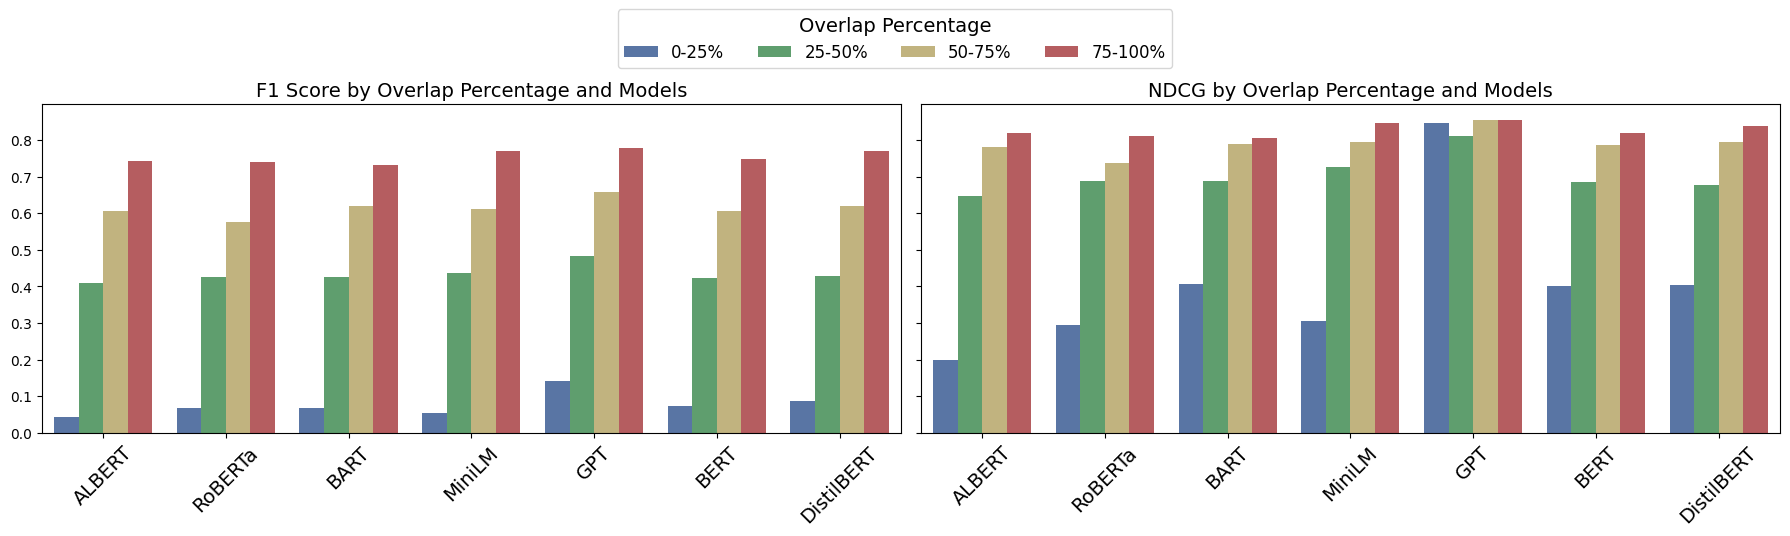

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
model_name_mapping = {
    "bert-base-uncased": "BERT",
    "distilbert-base-uncased": "DistilBERT",
    "sentence-transformers/all-MiniLM-L6-v2": "MiniLM",
    "albert-base-v2": "ALBERT",
    "facebook/bart-base": "BART",
    "gpt": "GPT",
    "roberta-base": "RoBERTa"
}


# Assuming the dataframe `dd` is already loaded and contains the necessary columns
dd = gpt.copy()
dd = dd.rename(columns={"NDCG at Median": "ngcd_at_median", "Model": "models"})
dd['models'] = dd['models'].replace(model_name_mapping)
md=dd['models'].iloc[:,0]
dd=dd.drop(columns=["models"])
dd['models']=md

# Define the required columns
required_columns = ['pourcentage_commun', 'F1 Score Median', 'models', 'Relation Type', "noise", "ngcd_at_median"]
data_perc = dd[required_columns].rename(columns={
    "Relation Type": "Relation_Type",
    "F1 Score Median": "F1_score",
    "ngcd_at_median": "NDCG"
}).sort_values(by="pourcentage_commun")

# Define percentage range bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
data_perc['pourcentage_commun_range'] = pd.cut(
    data_perc['pourcentage_commun'], bins=bins, labels=labels, include_lowest=True
)

# Group by percentage range and models, then calculate mean and std
metrics_with_variance = data_perc.groupby(['models', 'pourcentage_commun_range'], as_index=False).agg({
    'F1_score': ['mean', 'std'],
    'NDCG': ['mean', 'std']
}).sort_values(by="pourcentage_commun_range")

# Rename columns for clarity
metrics_with_variance.columns = ['models', 'pourcentage_commun_range', 'F1_mean', 'F1_std', 'NDCG_mean', 'NDCG_std']

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot F1 Score mean
sns.barplot(
    data=metrics_with_variance,
    x='models',
    y='F1_mean',
    hue='pourcentage_commun_range',
    ax=axes[0],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[0].set_title("F1 Score by Overlap Percentage and Models",fontsize=14)
axes[0].set_ylabel("", fontsize=14)
axes[0].set_xlabel("", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
axes[0].get_legend().remove()  # Remove individual legend

# Plot NDCG mean
sns.barplot(
    data=metrics_with_variance,
    x='models',
    y='NDCG_mean',
    hue='pourcentage_commun_range',
    ax=axes[1],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[1].set_title("NDCG by Overlap Percentage and Models",fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlabel("", fontsize=16)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)
axes[1].get_legend().remove()  # Remove individual legend

# Add a single legend in the center
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Overlap Percentage",fontsize=12,title_fontsize=14,
    loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4,
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend
plt.savefig("percentage_overlap_gpt.png")

plt.show()


## Llama

In [13]:
llama.groupby(["Category", "Relation"])[['f1_score','NDCG at Median.1']].agg(['mean', 'std'])


f1_score           NDCG at Median.1          
                                    mean       std             mean       std
Category Relation                                                            
ChEMBL   Joinable               0.415041  0.268516         0.593357  0.269064
         Semantically-Joinable  0.428594  0.255050         0.573022  0.291436
         Unionable              0.799517  0.092002         0.590567  0.276410
         View-Unionable         0.367377  0.237564         0.568535  0.284429
Magellan Unionable              0.902041  0.159506         0.589004  0.280371
TPC-DI   Joinable               0.503843  0.275612         0.576481  0.289721
         Semantically-Joinable  0.505488  0.282776         0.573248  0.282665
         Unionable              0.776182  0.081859         0.590871  0.284458
         View-Unionable         0.470182  0.218664         0.600246  0.281814
Wikidata Joinable               0.555556  0.000000         0.502668  0.350776
         Semantically-Joinable  0.222222  0.000000         0.494252  0.287473
         Unionable              0.974359  0.000000         0.653191  0.161164
         View-Unionable         0.470588  0.000000         0.675022  0.215597

/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/1922339331.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/1922339331.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/1922339331.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_3113/1922339331.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)


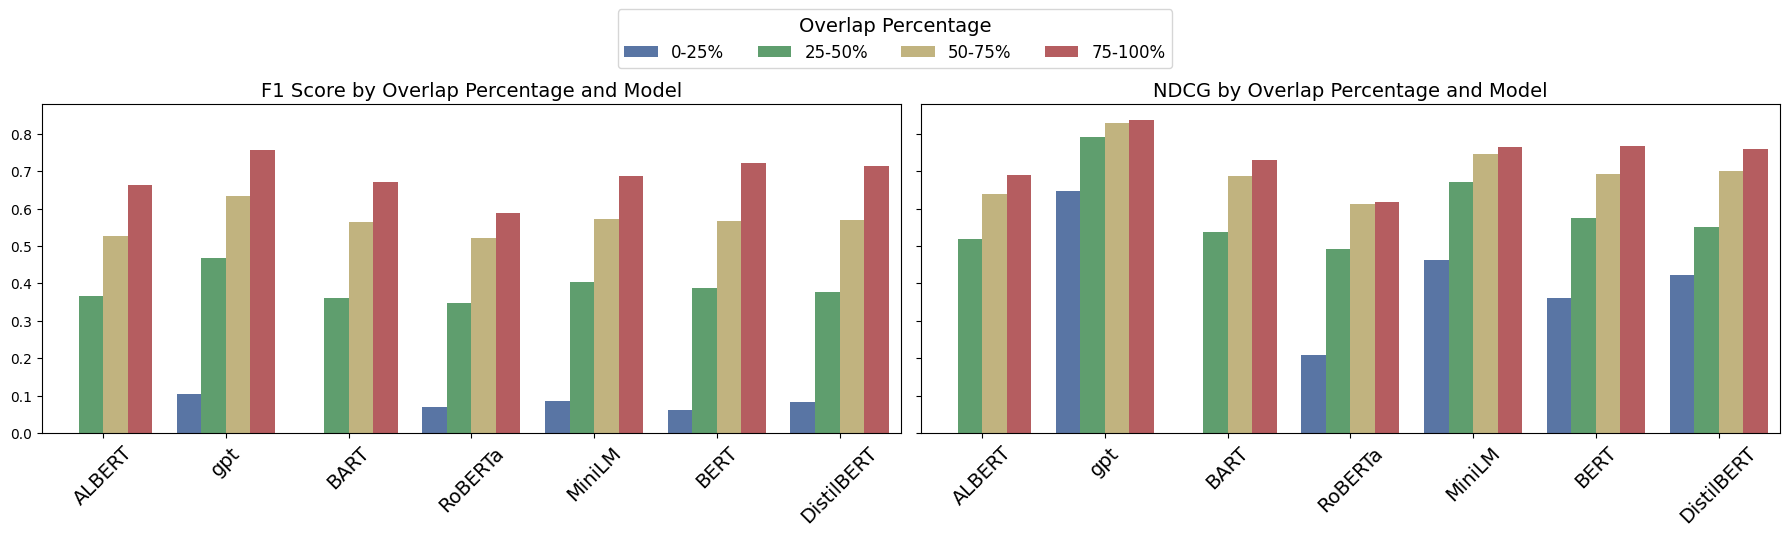

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
model_name_mapping = {
    "bert-base-uncased": "BERT",
    "distilbert-base-uncased": "DistilBERT",
    "sentence-transformers/all-MiniLM-L6-v2": "MiniLM",
    "albert-base-v2": "ALBERT",
    "facebook/bart-base": "BART",
    "llama": "llama",
    "roberta-base": "RoBERTa"
}


# Assuming the dataframe `dd` is already loaded and contains the necessary columns
dd = llama.copy()
dd = dd.rename(columns={"NDCG at Median": "ngcd_at_median", "Model": "Model"})
dd['Model'] = dd['Model'].replace(model_name_mapping)


# Define the required columns
required_columns = ['pourcentage_commun', 'F1 Score Median', 'Model', 'Relation', "Noise_Level.1", "ngcd_at_median"]
data_perc = dd[required_columns].rename(columns={
    "Relation Type": "Relation_Type",
    "F1 Score Median": "F1_score",
    "ngcd_at_median": "NDCG"
}).sort_values(by="pourcentage_commun")

# Define percentage range bins and labels
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "25-50%", "50-75%", "75-100%"]
data_perc['pourcentage_commun_range'] = pd.cut(
    data_perc['pourcentage_commun'], bins=bins, labels=labels, include_lowest=True
)

# Group by percentage range and Model, then calculate mean and std
metrics_with_variance = data_perc.groupby(['Model', 'pourcentage_commun_range'], as_index=False).agg({
    'F1_score': ['mean', 'std'],
    'NDCG': ['mean', 'std']
}).sort_values(by="pourcentage_commun_range")

# Rename columns for clarity
metrics_with_variance.columns = ['Model', 'pourcentage_commun_range', 'F1_mean', 'F1_std', 'NDCG_mean', 'NDCG_std']

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

# Plot F1 Score mean
sns.barplot(
    data=metrics_with_variance,
    x='Model',
    y='F1_mean',
    hue='pourcentage_commun_range',
    ax=axes[0],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[0].set_title("F1 Score by Overlap Percentage and Model",fontsize=14)
axes[0].set_ylabel("", fontsize=14)
axes[0].set_xlabel("", fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45,fontsize=14)
axes[0].get_legend().remove()  # Remove individual legend

# Plot NDCG mean
sns.barplot(
    data=metrics_with_variance,
    x='Model',
    y='NDCG_mean',
    hue='pourcentage_commun_range',
    ax=axes[1],
    palette=[
        "#4C72B0",  # Soft Navy Blue
        "#55A868",  # Gentle Green
        '#CCB974',  # Soft Gold
        "#C44E52"   # Muted Red
    ],
    ci=None
)
axes[1].set_title("NDCG by Overlap Percentage and Model",fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlabel("", fontsize=16)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=14)
axes[1].get_legend().remove()  # Remove individual legend

# Add a single legend in the center
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels, title="Overlap Percentage",fontsize=12,title_fontsize=14,
    loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4,
)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend
plt.savefig("percentage_overlap_llama.png")
plt.show()
